Pomogę Ci stworzyć wizualizacje na podstawie danych z analizy parametrów i wyników optymalizacji. Oto kilka wykresów, które możesz utworzyć, aby efektywnie wizualizować swoje odkrycia:

### 1. Wykresy słupkowe z przedziałami ufności dla każdego parametru



C:\Users\birzy\AppData\Local\Temp\ipykernel_21920\1830562869.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(grouped[param].astype(str), rotation=45)


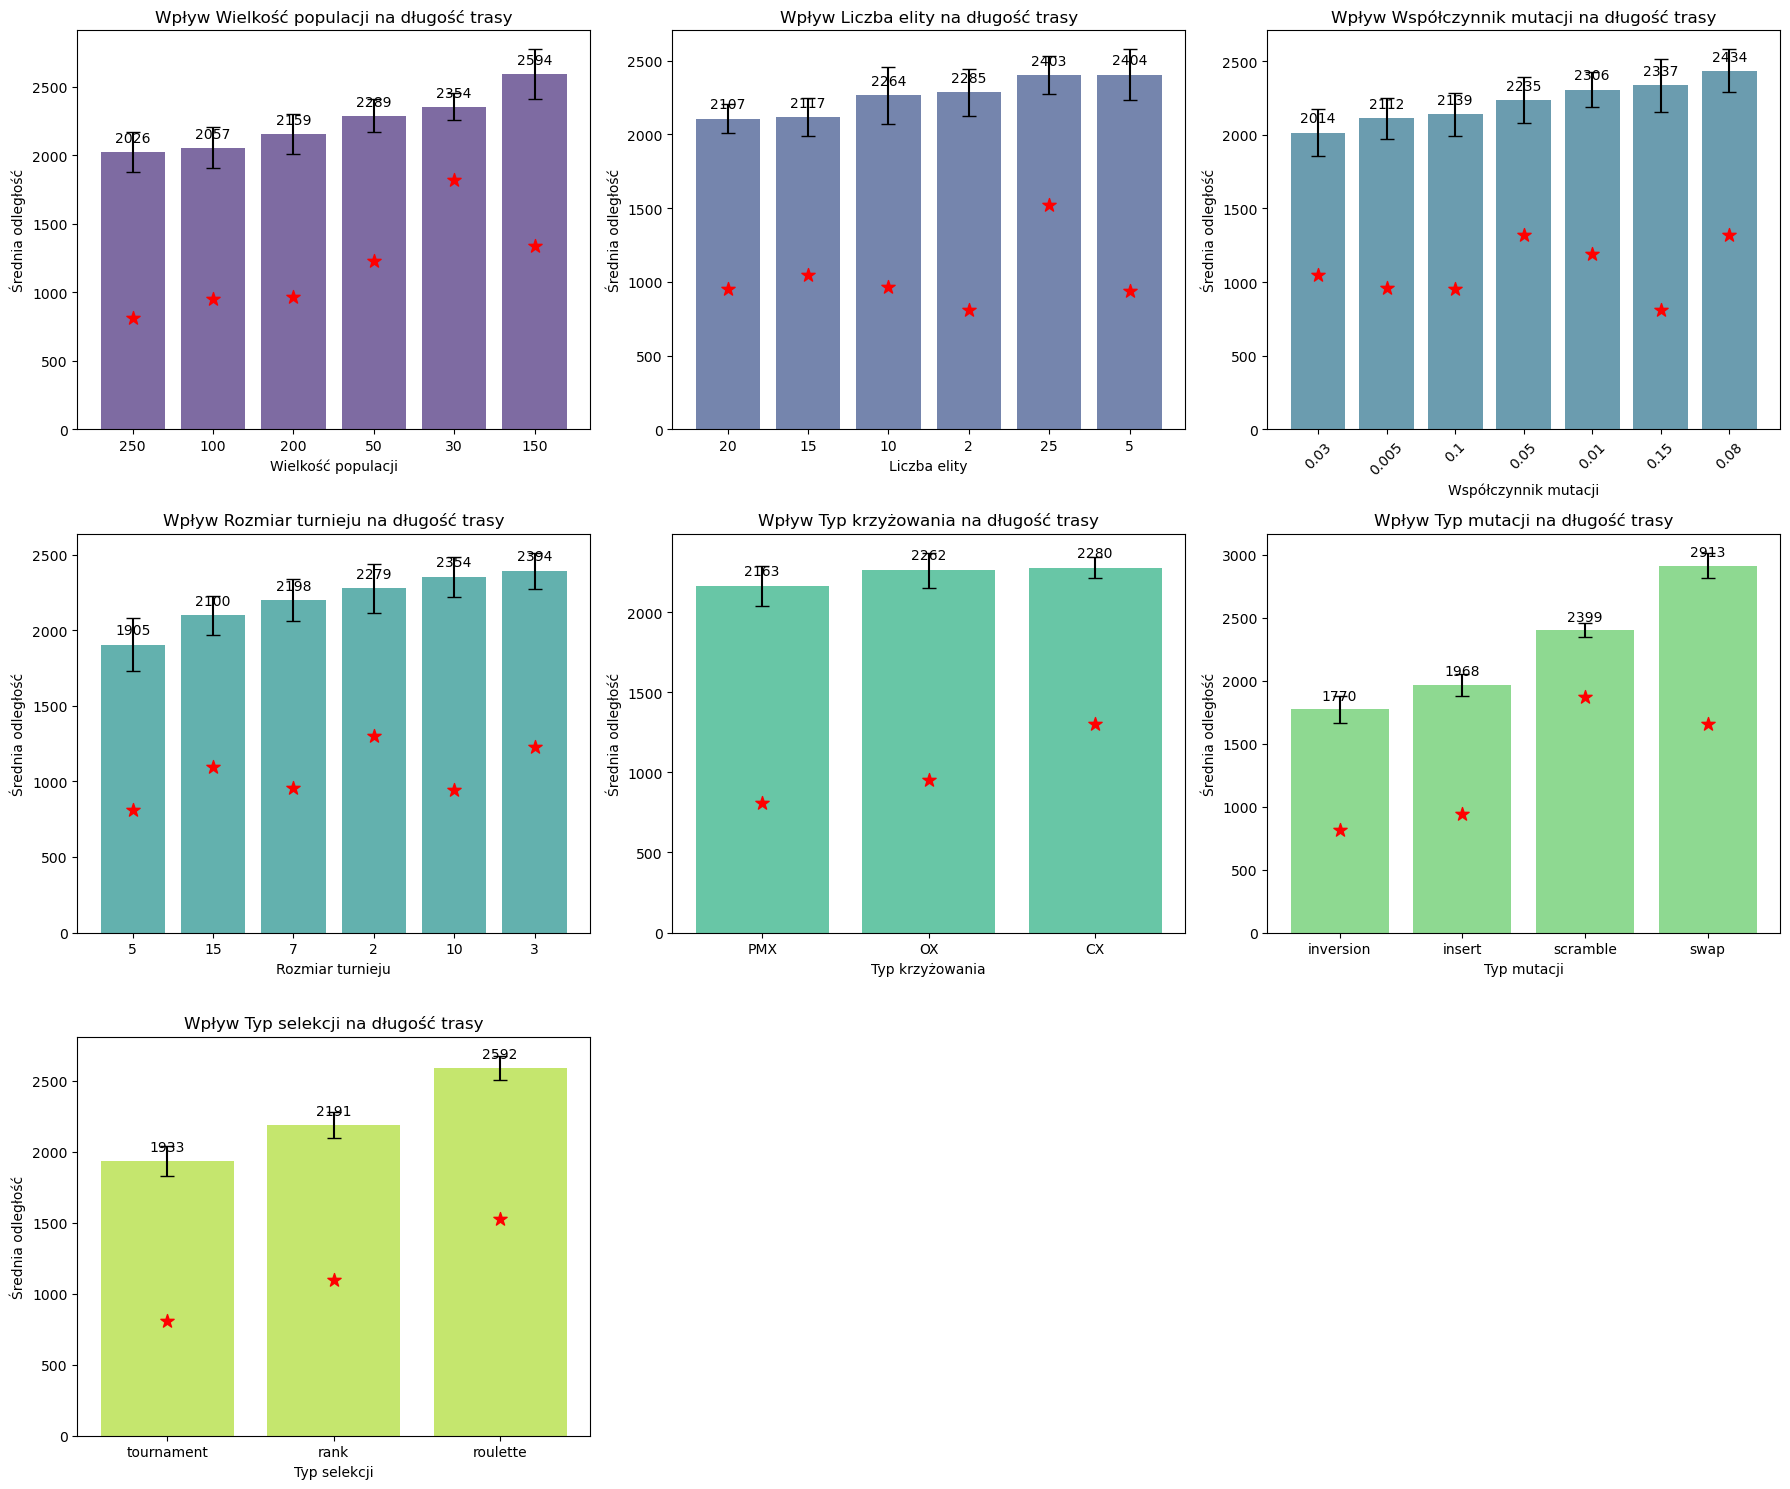

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the optimization results
results_df = pd.read_csv('results/parameter_optimization_results.csv')

# Create a figure with subplots for each parameter
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

# Parameters to analyze
parameters = ['population_size', 'elite_size', 'mutation_rate', 
              'tournament_size', 'crossover_type', 'mutation_type', 
              'selection_type']

# Parameter names in Polish
parameter_names_pl = {
    'population_size': 'Wielkość populacji',
    'elite_size': 'Liczba elity',
    'mutation_rate': 'Współczynnik mutacji',
    'tournament_size': 'Rozmiar turnieju',
    'crossover_type': 'Typ krzyżowania',
    'mutation_type': 'Typ mutacji',
    'selection_type': 'Typ selekcji'
}

# Color palette
colors = sns.color_palette("viridis", len(parameters))

for i, param in enumerate(parameters):
    if i >= len(axs):
        break
        
    # Group by parameter and calculate statistics
    grouped = results_df.groupby(param)['best_distance'].agg(['mean', 'std', 'min', 'count']).reset_index()
    grouped = grouped.sort_values('mean')  # Sort by mean distance
    
    # Create bar chart with error bars
    bars = axs[i].bar(grouped[param].astype(str), grouped['mean'], 
                      yerr=grouped['std']/np.sqrt(grouped['count']),
                      capsize=5, alpha=0.7, color=colors[i])
    
    # Add best value markers
    axs[i].scatter(grouped[param].astype(str), grouped['min'], color='red', 
                  marker='*', s=100, label='Najlepsza trasa')
    
    # Add labels and formatting
    axs[i].set_title(f'Wpływ {parameter_names_pl[param]} na długość trasy')
    axs[i].set_ylabel('Średnia odległość')
    axs[i].set_xlabel(parameter_names_pl[param])
    
    if len(grouped) > 6:  # Rotate labels if there are many categories
        axs[i].set_xticklabels(grouped[param].astype(str), rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2., height + 50,
                   f'{height:.0f}', ha='center', va='bottom')

# Hide any unused subplots
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.savefig('results/parameter_effect_bars.png', dpi=300)
plt.show()



### 2. Wykresy pudełkowe dla rozkładu parametrów



C:\Users\birzy\AppData\Local\Temp\ipykernel_21920\3923435895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=param, y='best_distance', data=results_df, ax=axs[i], palette='viridis')
C:\Users\birzy\AppData\Local\Temp\ipykernel_21920\3923435895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=param, y='best_distance', data=results_df, ax=axs[i], palette='viridis')
C:\Users\birzy\AppData\Local\Temp\ipykernel_21920\3923435895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=param, y='best_distance', data=results_df, ax=axs[i],

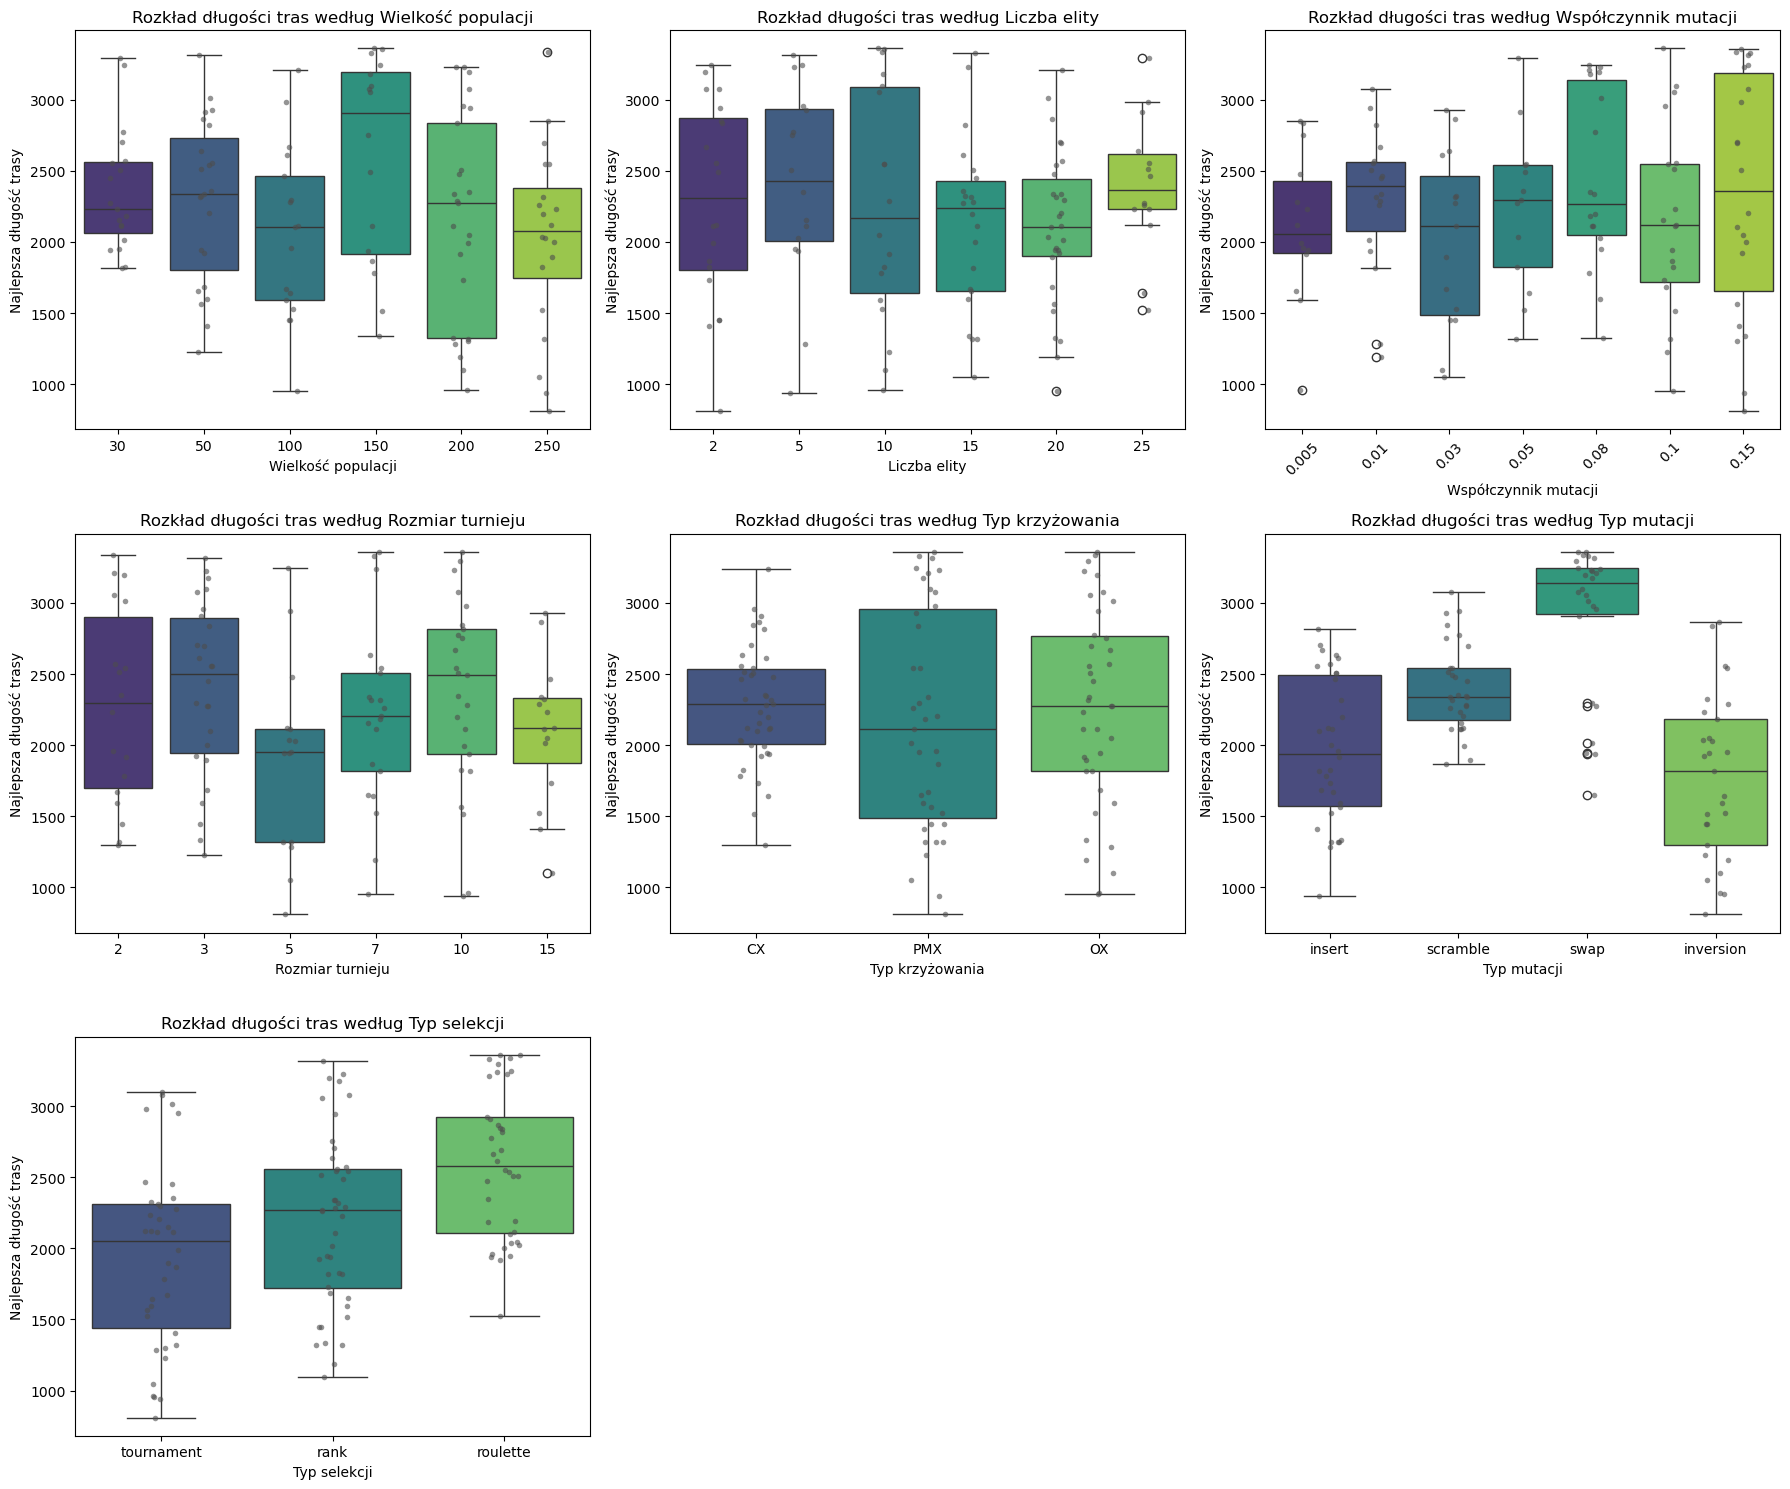

In [7]:
# Create boxplots for each parameter
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

for i, param in enumerate(parameters):
    if i >= len(axs):
        break
        
    # Create boxplot
    sns.boxplot(x=param, y='best_distance', data=results_df, ax=axs[i], palette='viridis')
    
    # Add individual points for better visualization
    sns.stripplot(x=param, y='best_distance', data=results_df, ax=axs[i], 
                 size=4, color='.3', alpha=0.6)
    
    # Add labels and formatting
    axs[i].set_title(f'Rozkład długości tras według {parameter_names_pl[param]}')
    axs[i].set_ylabel('Najlepsza długość trasy')
    axs[i].set_xlabel(parameter_names_pl[param])
    
    if len(results_df[param].unique()) > 6:  # Rotate labels if many categories
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.savefig('results/parameter_distribution_boxplots.png', dpi=300)
plt.show()



### 3. Mapa cieplna interakcji parametrów



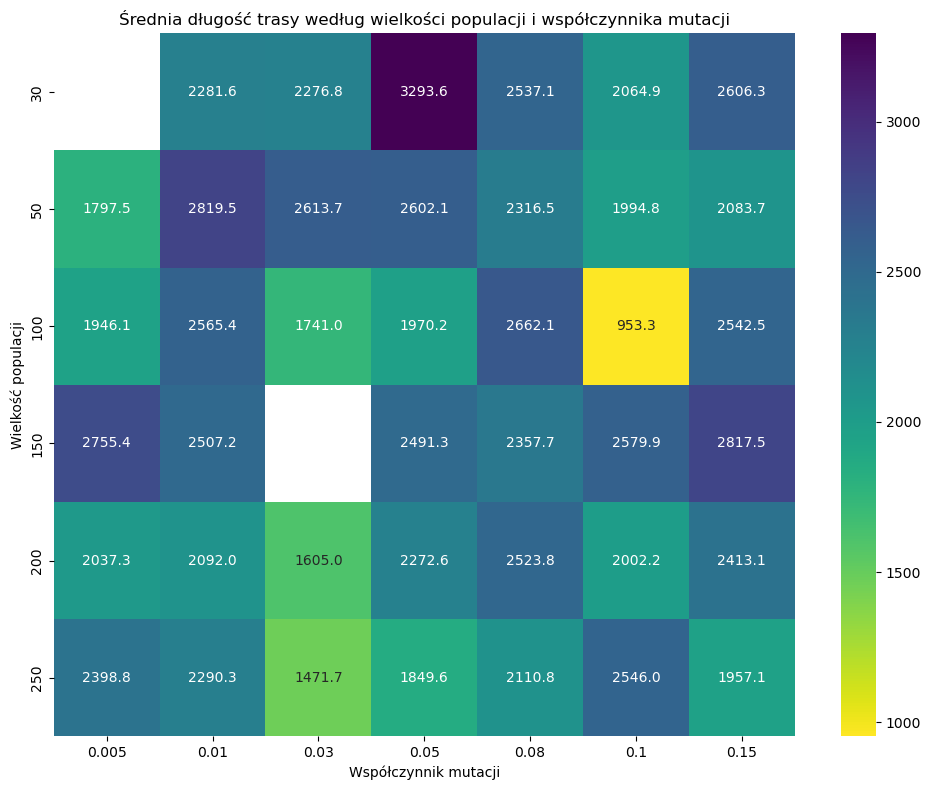

In [8]:
# Create a heatmap to show the interaction between two important parameters
# Let's use population_size and mutation_rate
pivot_table = pd.pivot_table(results_df, 
                            values='best_distance', 
                            index='population_size', 
                            columns='mutation_rate',
                            aggfunc='mean')

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='viridis_r', fmt='.1f')
plt.title('Średnia długość trasy według wielkości populacji i współczynnika mutacji')
plt.xlabel('Współczynnik mutacji')
plt.ylabel('Wielkość populacji')
plt.tight_layout()
plt.savefig('results/parameter_interaction_heatmap.png', dpi=300)
plt.show()



### 4. Wizualizacja najlepszej konfiguracji parametrów



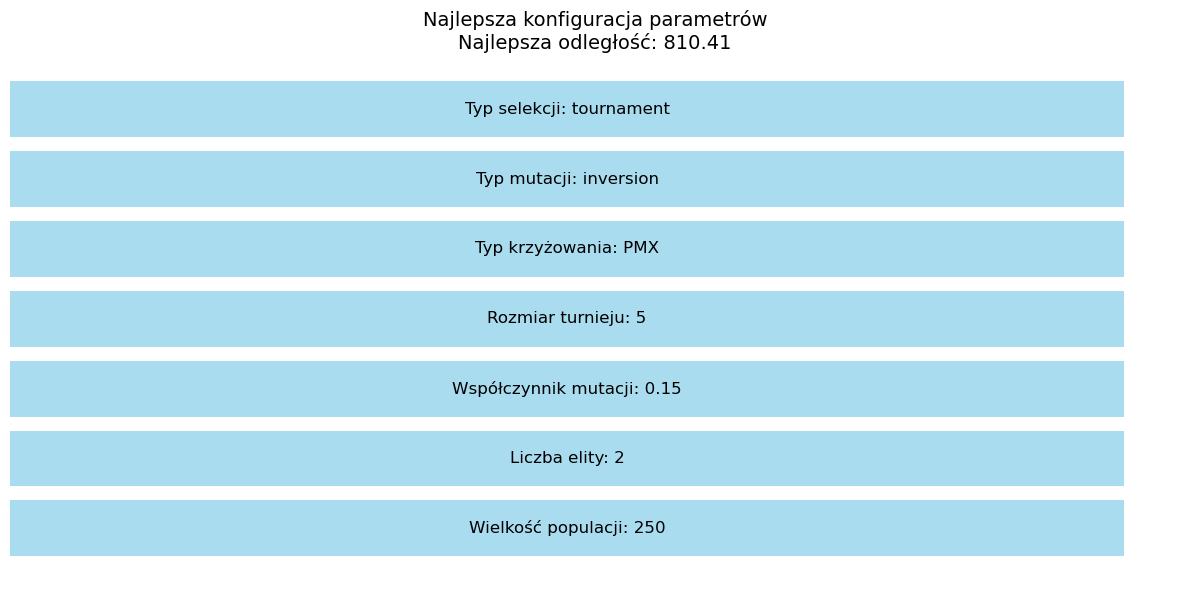

In [9]:
# Identify the best parameter configuration
best_config = results_df.loc[results_df['best_distance'].idxmin()]

# Create a figure to visualize the best configuration
fig, ax = plt.subplots(figsize=(12, 6))

# Define parameters to display
display_params = ['population_size', 'elite_size', 'mutation_rate', 
                 'tournament_size', 'crossover_type', 'mutation_type', 
                 'selection_type']

# Polish parameter names for display
display_params_pl = [parameter_names_pl[param] for param in display_params]

# Create parameter-value pairs for display
param_values = [f"{param_pl}: {best_config[param]}" for param, param_pl in zip(display_params, display_params_pl)]

# Plot as a horizontal bar chart with values
y_pos = np.arange(len(param_values))
ax.barh(y_pos, [1]*len(param_values), color='skyblue', alpha=0.7)

# Add parameter and value labels
for i, (param, value) in enumerate(zip(display_params_pl, [best_config[param] for param in display_params])):
    ax.text(0.5, i, f"{param}: {value}", ha='center', va='center', fontsize=12)

# Remove axes and set title
ax.set_yticks([])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title(f'Najlepsza konfiguracja parametrów\nNajlepsza odległość: {best_config["best_distance"]:.2f}', fontsize=14)
plt.tight_layout()
plt.savefig('results/best_parameter_config.png', dpi=300)
plt.show()



### 5. Wykres porównania wydajności



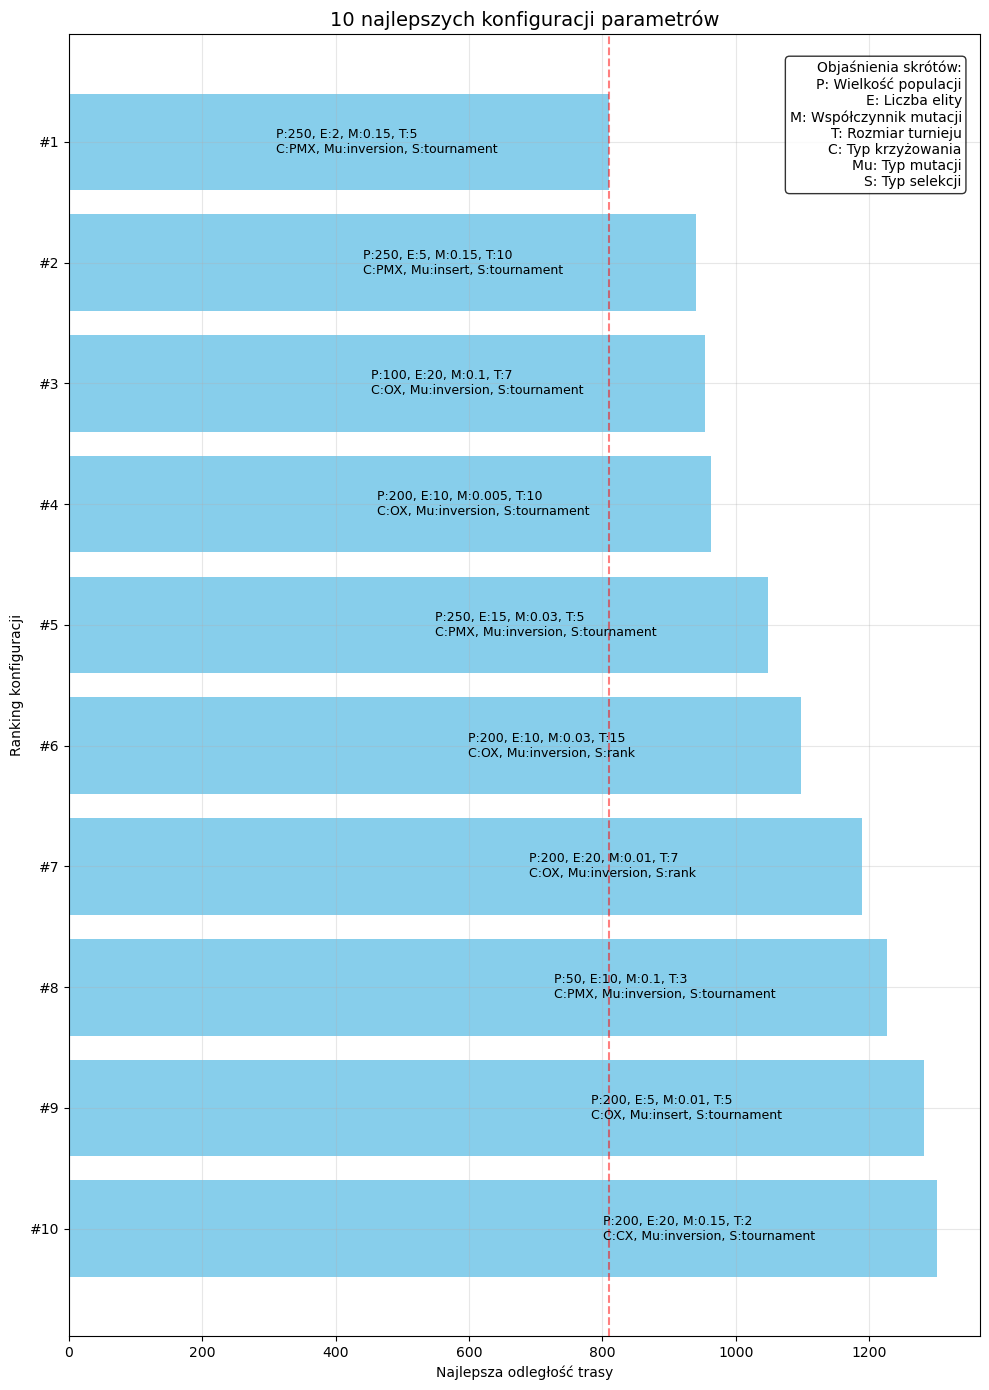

In [39]:
# Extract the top 10 best configurations
top_configs = results_df.sort_values('best_distance').head(10)

# Polish abbreviations for parameters
param_abbr = {
    'population_size': 'P',
    'elite_size': 'E',
    'mutation_rate': 'M',
    'tournament_size': 'T',
    'crossover_type': 'C',
    'mutation_type': 'Mu',
    'selection_type': 'S'
}

# Reverse the order for plotting so that best solution is #1
top_configs_reversed = top_configs.iloc[::-1].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 14))  # Swapped dimensions for horizontal layout
bars = plt.barh(range(len(top_configs_reversed)), top_configs_reversed['best_distance'], color='skyblue')

# Add configuration details as text labels
for i, (_, row) in enumerate(top_configs_reversed.iterrows()):
    config_text = f"{param_abbr['population_size']}:{row['population_size']}, {param_abbr['elite_size']}:{row['elite_size']}, "\
                  f"{param_abbr['mutation_rate']}:{row['mutation_rate']}, {param_abbr['tournament_size']}:{row['tournament_size']}\n"\
                  f"{param_abbr['crossover_type']}:{row['crossover_type']}, {param_abbr['mutation_type']}:{row['mutation_type']}, "\
                  f"{param_abbr['selection_type']}:{row['selection_type']}"
    plt.text(row['best_distance'] - 500, i, config_text, ha='left', va='center', fontsize=9)

plt.title('10 najlepszych konfiguracji parametrów', fontsize=14)
plt.xlabel('Najlepsza odległość trasy')
plt.ylabel('Ranking konfiguracji')
# Reverse the order of rankings so best is #1
plt.yticks(range(len(top_configs_reversed)), [f"#{10-i}" for i in range(len(top_configs_reversed))])

# Add a legend explaining abbreviations in the top right corner inside the plot
legend_text = '\n'.join([
    f"{abbr}: {parameter_names_pl[param]}" for param, abbr in param_abbr.items()
])
legend_text = f"Objaśnienia skrótów:\n{legend_text}"
plt.text(0.98, 0.98, legend_text, 
         transform=ax.transAxes, 
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'),
         verticalalignment='top',
         horizontalalignment='right')

plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.axvline(x=top_configs_reversed['best_distance'].min(), color='red', linestyle='--', label='Najlepsza odległość', alpha=0.5)
plt.savefig('results/top_10_configurations.png', dpi=300)
plt.show()